# Implementação de um Algoritmo Genético para Resolver o TSP


In [26]:
import numpy as np
import random as rn
import pandas as pd
import math as math
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
class WGraph():
    structure={}
    def __init__(self,matrix):
        self.n=matrix.shape[0]
        for i in range(self.n):
            temp={}
            for j in range(self.n):
                if matrix[i,j] !=0:
                    temp[j]=matrix[i,j]
                else:
                    matrix[i,j]=0
            self.structure[i]=temp
            
def fitnessSolution(G,sol):
    ends=0
    
    ends+=G.structure[sol[0]][sol[-1]]
    #print(ends,"last")
    for i in range(len(sol)-1):
        #print(G.structure[sol[i]][sol[i+1]],"value add")
        ends+=G.structure[sol[i]][sol[i+1]]
    
    #print(ends)
    return ends
            

def GenPath(Graph):
    GraphDict=Graph.structure
    a=np.arange(Graph.n)
    New=[]
    c=None
    while a.size!=0 and len(New)<Graph.n:
        size=a.size
        if len(New)==0:
            index=np.random.randint(size)
            c=a[index]
            a=np.delete(a,index)
            New.append(c)
        else:
            keys=list(GraphDict[c].keys())
            gen=True
            while gen:
                c=rn.choice(keys)
                if c not in New:
                    New.append(c)
                    gen=False

            index=np.where(a==c)[0][0]
            a=np.delete(a,index)
    return New
    



In [28]:
def Mutate(Sol):
    l=rn.sample(set(list(range(len(Sol)))),2)
    c1=Sol.index(l[0])
    c2=Sol.index(l[1])
    Sol[c1],Sol[c2]= Sol[c2],Sol[c1]
    return Sol

def checkEqual2(iterator):
    return len(set(iterator)) <= 1


In [29]:
# Crossover

def AdjList(P1):
    List=[]
    for i in range(len(P1)):
        lista=[]
        index=P1.index(i)
        if index==(len(P1)-1):
            lista.append(P1[index])
            lista.append(P1[0])
            List.append(lista)
        elif index==0:
            lista.append(P1[index+1])
            lista.append(P1[-1])
            List.append(lista)
        else:
            lista.append(P1[index+1])
            lista.append(P1[index-1])
            List.append(lista)
    return List

def UnionList(A,B):
    Union=[]

    for i in range(len(A)):
        set1=A[i]
        set2=B[i]
        Union.append(list(set().union(set1,set2)))

    return Union

def deleteList(List,element):

    for segment in List:
        if element in segment:
            segment.remove(element)

    return List 

# Reprodução 
def crossOverEdge(P1,P2):
    
    adj1=AdjList(P1)
    adj2=AdjList(P2)

    gene_start=[P2[0],P1[0]]
    son=[[],[]]
   
    for k in range(len(gene_start)):
        
        gene=gene_start[k]
        
        UnionAdj=UnionList(adj1,adj2)
        
        son[k].append(gene)
        
        while len(son[k])<len(P1):
            
            
            UnionAdj=deleteList(UnionAdj,gene)

            if not UnionAdj[gene]:
                index_list=list(range(len(UnionAdj)))
                options=[item for item in index_list if item not in son[k]]
                X=rn.choice(options)
                
            else:
                f= lambda x: len(x) 
                orde=[f(UnionAdj[x]) for x in UnionAdj[gene]]
                res_list = [i for i in range(len(orde)) if orde[i] == min(orde)]
                index=rn.choice(res_list)
                X=UnionAdj[gene][index]
            
            son[k].append(X)
            gene=X
  
    return son[0],son[1]


def Reproduction(sortedPopulation,mutation_rate,Graph):
    PARENTS=sortedPopulation[:int(len(sortedPopulation)/2)]
    NEW_POP=[x for x in PARENTS]
    CHILDREN=[]
    while len(CHILDREN)<len(NEW_POP):
        x=rn.choice(PARENTS)
        y=rn.choice(PARENTS)
        
        
        son1,son2=crossOverEdge(x,y)
        
        # Para Cada Cria Gerada
        r1=rn.uniform(0,1)
        r2=rn.uniform(0,1)
        if r1<=mutation_rate:
            son1=Mutate(son1)
        if r2<=mutation_rate:
            son2=Mutate(son2)

        CHILDREN.append(son1)
        CHILDREN.append(son2)


                           
   
                        
    return CHILDREN


99    4603.0
Name: MIN_VAL, dtype: float64
99    [2, 5, 0, 4, 6, 3, 9, 1, 7, 8]
Name: BEST_SOLUTION, dtype: object


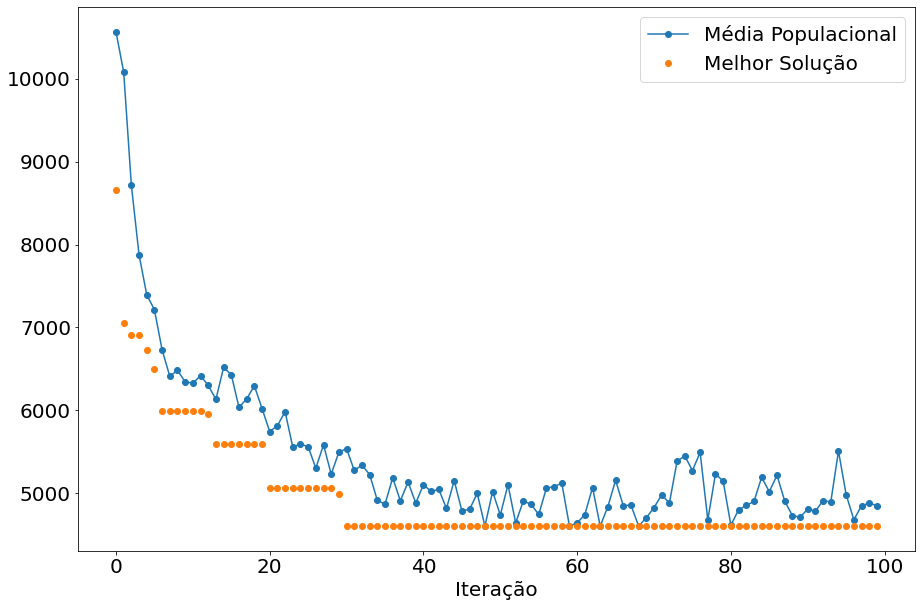

In [30]:
if __name__ == "__main__":
    #----------------------------------------------------------------------------------------
    C=np.matrix([[   0.,  928.,  987., 1961.,  977.,  232., 1610., 1943., 1361.,
        1467.],
       [ 928.,    0., 1656.,  577., 1879., 1584., 1330.,  351., 1909.,
         470.],
       [ 987., 1656.,    0.,  387., 1575.,  332., 1978.,  857.,  754.,
         987.],
       [1961.,  577.,  387.,    0., 1471.,  844.,  576., 1615.,  129.,
          92.],
       [ 977., 1879., 1575., 1471.,    0., 1358.,  727.,  434.,  872.,
         671.],
       [ 232., 1584.,  332.,  844., 1358.,    0., 1087.,  585.,  187.,
         384.],
       [1610., 1330., 1978.,  576.,  727., 1087.,    0., 1151., 1529.,
        1361.],
       [1943.,  351.,  857., 1615.,  434.,  585., 1151.,    0.,   92.,
        1507.],
       [1361., 1909.,  754.,  129.,  872.,  187., 1529.,   92.,    0.,
         569.],
       [1467.,  470.,  987.,   92.,  671.,  384., 1361., 1507.,  569.,
           0.]])
    
    DIM=C.shape[0]
    POPULATION_SIZE=10
    MAX_ITER=100
    MUTATE_PROB=0.05
    data_stats = {'AVG_POP_FIT':[], 'MIN_VAL': [],'BEST_SOLUTION':[],'POPULATION':[]} 

    #----------------------------------------------------------------------------------------
    
    Graph=WGraph(C)
    
    # Gerar População Inicial-------- 
    initPop=[]
    for i in range(POPULATION_SIZE):
        sol=GenPath(Graph)
        initPop.append(sol)
    #--------------------------------
    # MAIN LOOP: The Running of the GA.
    NEW_POP=initPop    
    for iter in range(MAX_ITER):
        
        costs=[fitnessSolution(Graph,i) for i in NEW_POP]
        sorted_index=sorted(range(len(costs)), key=lambda k: costs[k])
        runningPop=[NEW_POP[sorted_index[i]] for i in range(int(len(NEW_POP)))]
        
        runningPop=runningPop[:DIM] # SELECT WHO DIES 
        
        AVG=sum(costs)/len(costs)
        
        data_stats['AVG_POP_FIT'].append(AVG)
        data_stats['MIN_VAL'].append(fitnessSolution(Graph,runningPop[0]))
        data_stats['POPULATION'].append(runningPop)
        data_stats['BEST_SOLUTION'].append(runningPop[0])
            
        NEW_POP=Reproduction(runningPop,MUTATE_PROB,Graph) + runningPop

    df = pd.DataFrame(data_stats)
    plt.rcParams.update({'font.size': 20})
    plt.figure(num=None, figsize=(15, 10))
    plt.plot(df['AVG_POP_FIT'],'-o',label='Média Populacional')
    plt.plot(df['MIN_VAL'],'o',label='Melhor Solução')
    plt.xlabel("Iteração")
    #plt.title("Algoritmo Genético - Resolvendo o Problema do Caixeiro Viajante")
    plt.legend()
    plt.savefig('resultado.png',dpi=150)
    print(df['MIN_VAL'].tail(1))
    print(df['BEST_SOLUTION'].tail(1))


